In [232]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import copy
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import string 
import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import catboost
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import optuna
from optuna.samplers import RandomSampler
from optuna.integration import OptunaSearchCV
from optuna.distributions import IntUniformDistribution, UniformDistribution

In [233]:
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', 30000)
pd.set_option('display.max_row', 30000)

In [234]:
train = pd.read_csv(r'D:\Python\Zindi\News\Train.csv') 
test = pd.read_csv(r'D:\Python\Zindi\News\Test.csv')
submission = pd.read_csv(r'D:\Python\Zindi\News\SampleSubmission.csv')

In [235]:
train.shape, test.shape, submission.shape

((1436, 3), (620, 2), (620, 2))

In [236]:
train.head(100)

,ID,Text,Label
0,ID_AASHwXxg,"Mwangonde: Khansala wachinyamata Akamati achinyamata ndi atsogoleri a mawa, ambiri amaganiza kuti izi ndi nkhambakamwa chabe. Koma achinyamata ena, monga Lusubilo Mwangonde, akukwaniritsa akupherezetsa mawuwa osati pongolota kuti adzakhala, koma kutsogolera kumene chifukwa nthawi yawo yakwana. DAILES BANDA adacheza ndi Mwangonde, khansala wachinyama, yemwe akuimira Jumbo Ward mumzinda wa Mzuzu, motere: Chisale watuluka nkumangidwanso Sipakala waimitsa Nyumba ya Malamulo Pa Wenela pasinth...",POLITICS
1,ID_AGoFySzn,"MCP siidakhutire ndi kalembera Chipani cha Malawi Congress Party (MCP) chati ngakhale ndime yachiwiri ya kalembera wa zisankho yayenda bwino poyerekeza ndi yoyamba, MEC iganizire zobwereranso mmaboma omwe yadutsamo kale kaamba koti anthu ambiri sadalembetse.\n Koma mkulu wa bungwe la Malawi Electoral Commission (MEC), Jane Ansah, wati ndi wokhutira ndi mmene kalembera wayendera mgawo lachiwiri.\n Chakwera akwanitse malonjezoHRDC Masankhidwe a nduna autsa mapiri pa chigwa Malonjezo ayamba...",POLITICS
2,ID_AGrrkBGP,"Bungwe la MANEPO Lapempha Boma Liganizire Anthu Achikulire pa Mliri wa Coronavirus Bungwe loyanganira anthu achikulire la Malawi Network of Older Persons Organisation (MANEPO) lapempha boma kuti liganizire anthu achikulire pomwe likuyika ndondomeko zokhudza nthenda ya COVID-19. \nKudzera mu kalata yomwe bungwe la Manepo latulutsa, mkulu wa bungweli Andrew Kavala wati kusowa kwa malamulo okhazikika oteteza anthu achikulire kukupitilira kuyika anthuwa pa chiopsyezo cha nkhanza zosiyanasiyana. ...",HEALTH
3,ID_AIJeigeG,"Ndale zogawanitsa miyambo zanyanya Si zachilendonso kumva kuti andale adzetsa ziwawa pamwambo wachikhalidwe. Lamulungu, kudali gwiragwira kokhazikitsa mwambo wag ulu la Ayao lomwe likutchedwa Chiwanja Cha Ayao.\n Pamwambowo, wothandizira wachiwiri kwa mtsogoleri wa dziko lino Saulos Chilima adamunjata pomuganizira kuti amachita zokaikitsa.\n CSOs in Pay Back Our Money campaign Govt to review Genset deal Govt moves to audit firearms Othandizira Chilima (pakati) adamangidwa pochita zokaiki...",POLITICS
4,ID_APMprMbV,"Nanga wapolisi ataphofomoka? Masiku ano sichikhala chachilendo kuona apolisi atakwera galimoto mosayenera. Ngakhale ntchito yawo nkuonetsetsa kuti malamulo akutsatidwa, ngakhale pamsewu, apolisiwo ndiwo amakhala oyamba kuphwanya malamulowo. Kodi anthu wamba atakwera galimoto monga achitira apa apolisi, sangakalowe kozizira? Mwinatu iwowa ali ndi mphamvu kuposa lamulo.\n",LAW/ORDER
5,ID_ARZdpinF,"Kusamvetsetsana kwabuka ku Mwanza Kusamvetsetsana kwabuka pakati pa anthu a ku Mphete mboma la Mwanza ndi ofesi ya DC wa bomali chifukwa cha nyumba ya mphunzitsi pasukulu ya Mphete imene kampani yokonza njani ya Vale Logistics idagwetsa.\n Malinga ndi mlembi wakomiti yoyendetsa ntchito za pasukulu ya Mphete, Allan Gaviyawo , mchaka cha 2012 a kampani ya Vale Logistics adagwetsa nyumba ya mphunzitsi imodzi pasukulu ya Mphete chifukwa inali pamalo pomwe payenera kudutsa njanji yomwe ikudutsa ...",LAW/ORDER
6,ID_ASbcNLkZ,"Kwaya ya St. James Chilomoni Yakwanitsa Zaka 40 Wolemba: Sylvester Kasitomu wp-content/uploads/2019/09/chilomoni.jpg"" alt="""" width=""427"" height=""391"" />Tchalitchi la St. James Chilomoni ku Blantyre Kwaya ya St. James ya m`parish ya Chilomoni mu arkdayosizi ya Blantyre yayamikira mamembala ake omwe akhala akutumikira mu kwayayi kwa nthawi yaitali kamba ka kakudzipereka kwao potukula maimbidwe mu kwayayi. \nWapampando wa kwayayi a Ezekiel Lokote ndiwo alankhula izi pa mwambo wa msembe ya ukari...",RELIGION
7,ID_AUwhZUlr,"Mayi wamalonda avulazidwa ku bt Titha Masamba, wa zaka 31, akumva ululu wadzaoneni. Kuti ayende akuyenera agwirire ndodo; sangagone chafufumimba koma chammbali kapena chagada; moyo wamtendere watha.\n Akuti adamuphera tsogolo lake: Masamba kumva ululu kunyumba kwake Akuti izitu zili chonchi chifukwa cha bala lomwe lili pabondo lake la kumanja lomwe lidasokedwa kuchipatala pambuyo pokhapidwa ndi chikwanje.\n Chisale watuluka 

In [237]:
train["Label"].value_counts(normalize=True)

POLITICS                0.194290
SOCIAL                  0.105850
RELIGION                0.102368
LAW/ORDER               0.094708
SOCIAL ISSUES           0.093315
HEALTH                  0.088440
ECONOMY                 0.059889
FARMING                 0.054318
SPORTS                  0.034123
EDUCATION               0.029944
RELATIONSHIPS           0.027159
WILDLIFE/ENVIRONMENT    0.025070
OPINION/ESSAY           0.018106
LOCALCHIEFS             0.017409
CULTURE                 0.016017
WITCHCRAFT              0.011142
MUSIC                   0.010446
TRANSPORT               0.007660
ARTS AND CRAFTS         0.004875
FLOODING                0.004875
Name: Label, dtype: float64

<AxesSubplot:xlabel='Label'>

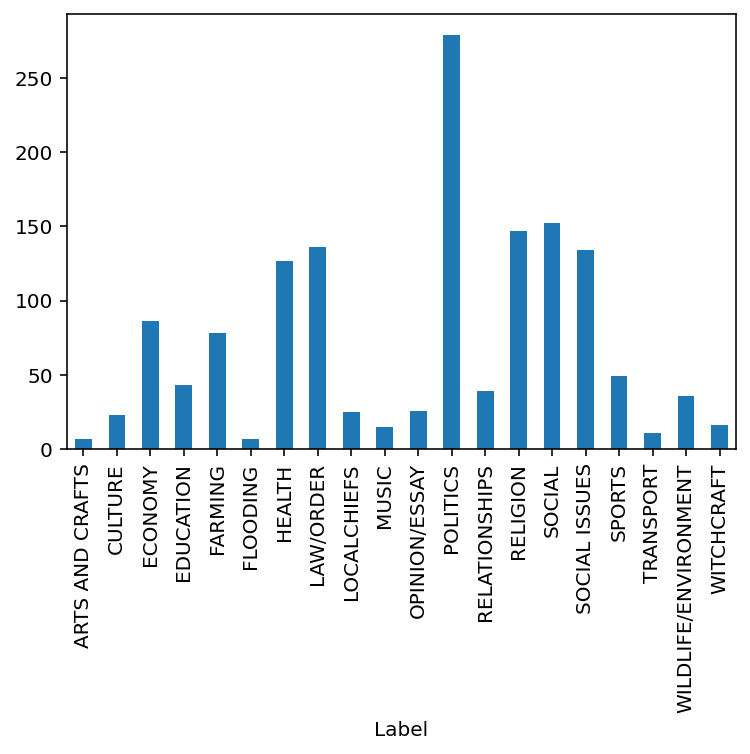

In [238]:
train.groupby('Label').ID.count().plot.bar(ylim=0)

In [239]:
# function to remove non-ASCII chars from data
def clean_ascii(text):
    return ''.join(i for i in text if ord(i) < 128)

train['Text'] = train['Text'].apply(clean_ascii)
test['Text'] = test['Text'].apply(clean_ascii)

In [240]:
train.head(1)

,ID,Text,Label
0,ID_AASHwXxg,"Mwangonde: Khansala wachinyamata Akamati achinyamata ndi atsogoleri a mawa, ambiri amaganiza kuti izi ndi nkhambakamwa chabe. Koma achinyamata ena, monga Lusubilo Mwangonde, akukwaniritsa akupherezetsa mawuwa osati pongolota kuti adzakhala, koma kutsogolera kumene chifukwa nthawi yawo yakwana. DAILES BANDA adacheza ndi Mwangonde, khansala wachinyama, yemwe akuimira Jumbo Ward mumzinda wa Mzuzu, motere: Chisale watuluka nkumangidwanso Sipakala waimitsa Nyumba ya Malamulo Pa Wenela pasinth...",POLITICS


In [241]:
import string
import operator
import functools

letters = string.ascii_letters
digits = string.digits
punctuation = string.punctuation

# Number of caracters in the text
train['Charac_count'] = train.Text.apply(lambda i: len(i))
test['Charac_count'] = test.Text.apply(lambda i: len(i))

#additional
train['Word_count'] = train.Text.apply(lambda x: len(x.split()))
test['Word_count'] = test.Text.apply(lambda x: len(x.split()))

train['Word_density'] = train['Charac_count']/(train['Word_count']+1)
test['Word_density'] = test['Charac_count']/(test['Word_count']+1)

train.drop('Word_count', axis=1, inplace = True)
test.drop('Word_count', axis=1, inplace = True)

train['Title_word_count'] = train.Text.apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
test['Title_word_count'] = test.Text.apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))

train['Upper_case_word_count'] = train.Text.apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
test['Upper_case_word_count'] = test.Text.apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

#best
train['Len_punct'] = train.Text.apply(lambda i: len(list(filter(functools.partial(operator.contains, punctuation), i))))
test['Len_punct'] = test.Text.apply(lambda i: len(list(filter(functools.partial(operator.contains, punctuation), i))))

train['Len_letter'] = train.Text.apply(lambda i: len(list(filter(functools.partial(operator.contains, letters), i))))
test['Len_letter'] = test.Text.apply(lambda i: len(list(filter(functools.partial(operator.contains, letters), i))))

train['Len_digit'] = train.Text.apply(lambda i: len(list(filter(functools.partial(operator.contains, digits), i))))
test['Len_digit'] = test.Text.apply(lambda i: len(list(filter(functools.partial(operator.contains, digits), i))))

In [242]:
# no impACT
#import re

#train['Len_words'] = train.Text.apply(lambda i: len(re.findall(r'\w+', i)))
#test['Len_words'] = test.Text.apply(lambda i: len(re.findall(r'\w+', i)))

<AxesSubplot:>

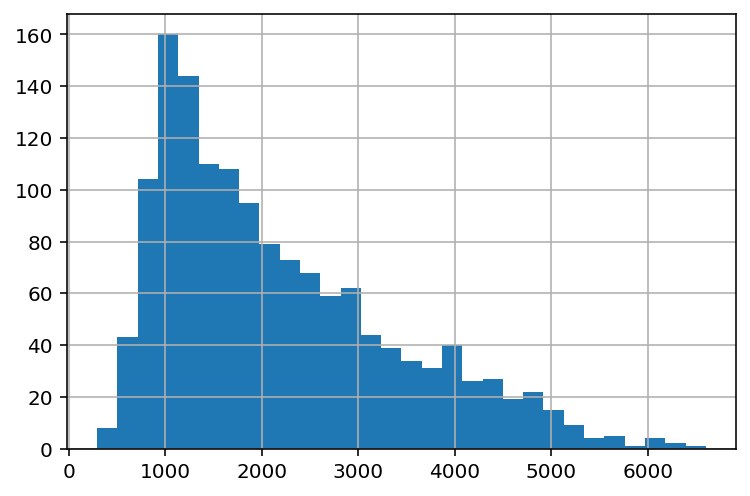

In [243]:
train.Charac_count.hist(bins=30)

<AxesSubplot:xlabel='Label'>

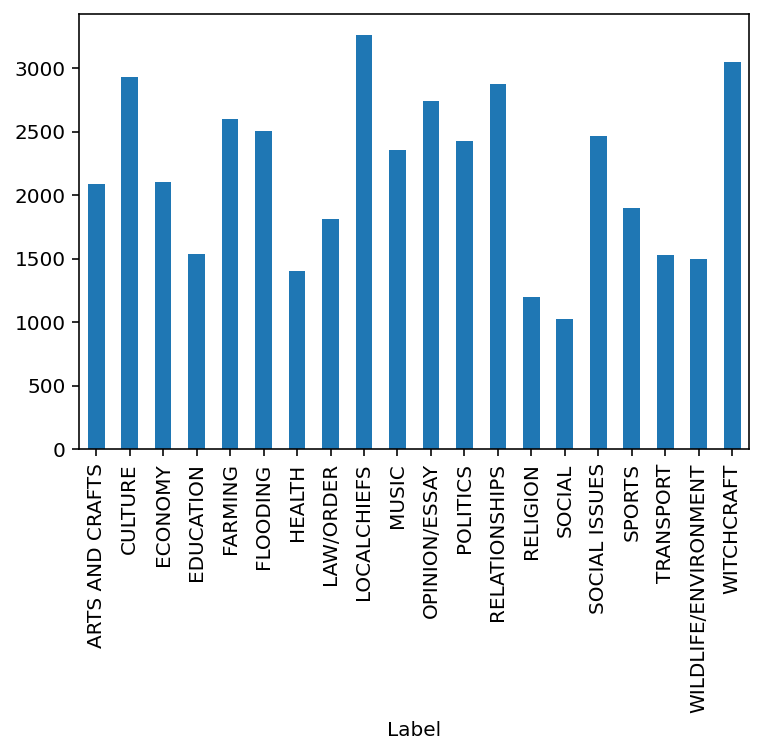

In [244]:
train.groupby('Label').Charac_count.median().plot.bar(ylim=0)

In [245]:
train['Text'] = train['Text'].str.lower()
test['Text'] = test['Text'].str.lower()

In [246]:
class stemming:
    '''The class is responsible for removing all the suffixes of a word'''

    def __init__(self):
        self.prefix=['mwa','mwau','mo','ku', 'li','i','zo','ndina',
        'ada','ada','anka','wo','a','pa','mu','ma','mi','chi','ka','ti','u','zi','si','su','sa','woka','woza','po','o','la','wa','na','nko','nkwa']
        self.infix=['dz','nk','mm','na','ku','da','sa','ma']
        self.suffix=['be','nso','ni','eka','di','itsa','era','tsa','ana','chi','li','ti','ko','ja','po','mu','mo','ku','ko','nji','edwa','idwa','tu']

        self.b = ""  # buffer for word to be stemmed
        self.k = 0
        self.k0 = 0
        self.j = 0   # j is a general offset into the string        self.s_len=''

    def ends(self, suffix):
        """ends(s) is TRUE <=> k0,...k ends with the string s."""        
        length =len(suffix)
        self.s_len=length
        
        if length>=len(self.b):# do nothing if the word is not attached to a stem
            return 0

        if suffix[length - 1] != self.b[self.k]: # tiny speed-up
            return 0
        if length >(self.k - self.k0 + 1):
            return 0
        if self.b[self.k-length+1:self.k+1] != suffix:
            return 0
        self.j = self.k - length
        return 1

    def strip_suffix_only(self):
        found=False
        for x in self.suffix:
            length=len(x)
            index=len(self.b)-length-1 #find the position os the latter befor the suffix
            if self.b.endswith(x):
                found=True 
                if self.cons(index): #test if the letter  b4  is a vowel
                    if length>2 :
                        if self.b[index]=='w':
                            pass
                        else:
                            self.k=len(self.b)-length  
                            self.setto("a") 
                    else:
                        pass
                else:
                    self.k= len(self.b)-length-1# remove the  leter before the suffix
                    self.setto("a")
    def is_stem(self,word):
        
        
        with open("stem_dictionary.txt",'r') as openfile:# open a file that contains stem
            stems=openfile.read()
            
            if word not in stems:
                    return 0
            else:
                return 1


    def inside_sterm(self):
        
        
        with open("stem_dictionary.txt",'r') as openfile:
            stem=openfile.read()
            stems=stem.split()
            k0=0
            k=0
            len_1=0
            index_1=-1
            
            for x in stems:
                index=self.b.find(x)
                if index !=-1:
                    length=len(x)
                    if length>len_1:
                        len_1=length
                        index_1=index

                if index>-1:
                    self.k0=index_1
                    self.k=len_1+index_1-1
                else:
                    pass
            

                          

    def strip_infix(self):
        for x in self.infix:
            length=len(x)
            total_len=len(self.b)
            index=self.b.find(x)
            if index >0 and index <5 and not self.b.endswith(x):
                if index+length+1==total_len:
                    break
                if self.cons(length+index): #test if the next letter after infix is a vowel
                    self.k0=length+index# do not remove the next leter after infix
                    break
                else:
                    self.k0=length+index+1# remove the next leter after infix
                    break
                    
            else:
                self.strip_suffix_only()



    def strip_prefix(self,prefix):
        ''' strip all the types of prifixes if the word does not start with one type of prix try the other type'''
        length=0
        test=self.b
        for x in prefix:
            if self.b.startswith(x):
                length=len(x)
                self.k0=length
                

    def setto(self, s):
        """setto(s) sets (j+1),...k to the characters in the string s, readjusting k."""
        length = len(s)
        if len(self.b)>length:
            self.b = self.b[:self.j+1] + s + self.b[self.j+length+1:]
            self.k = self.j + length
            self.start_with()

    def stems_to_word(self):
        """step1ab() gets rid of suffixes that that that makes a word to be an adverb or that make the word to be an object of a sentnce
        """
        if self.ends("idwa") or self.ends("ika") or self.ends("etsa") or self.ends("ira") or self.ends("era") or self.ends("edwa")  or self.ends("itsa")or self.ends("ire") or self.ends("eka"):
            self.setto("a")
        elif self.ends("nso") or  self.ends("be"):
            self.setto('')
        else:
            self.strip_infix()


    def cons(self, i):
        """decide whether a letter is consonat or not."""
        if self.b[i] == 'a' or self.b[i] == 'e' or self.b[i] == 'i' or self.b[i] == 'o' or self.b[i] == 'u':
            return 0
        else:
            return 1

    def start_with(self):
        
        for x in self.prefix:
            length=len(x)
            if self.b.startswith(x):
                self.k0=length

     
    def stem(self, p, i, j,affix):
        """In stem(p,i,j), p is a char pointer, and the string to be stemmed
        is from p[i] to p[j] inclusive. Typically i is zero and j is the
        """
        # copy the parameters into statics
        self.b = p
        self.k = j
        self.k0 = i
        if self.k <= self.k0 + 1:
            return self.b # --DEPARTURE--

    
        if affix==1:
            self.strip_infix()
        elif affix==2:
            self.strip_prefix(self.prefix)
        elif affix==0:
            self.inside_sterm()
        else:
            self.stems_to_word()
            
        
        return self.b[self.k0:self.k+1]


def is_in_stopword(word):
        
        
        with open("stop_words.txt",'r') as openfile:# open a file that contains a list of stop words
            stopwords=openfile.read()
            
            if word not in stopwords:
                    return 0
            else:
                return 1




In [247]:
def stemm_(x):

    mawu=[]
    ina=[]
    unchanged=0
    correctl_stemmed=0
    under_stemmed=0
    over_stemmed=0
    all_words=0
    count=0
    p = stemming()
    word=x # this is the word to be stemmed
    stop_word=False
    if is_in_stopword(word):
        stop_word=True
    
    if stop_word==True:
        return word
    else:
    
        if p.is_stem(word):
                pass    
        else:
            word=p.stem(word,0,len(word)-1,0)

        if p.is_stem(word):
            pass    
        else:
            word=p.stem(word,0,len(word)-1,1)

        if p.is_stem(word):
            pass    
        else:
            word=p.stem(word,0,len(word)-1,2)

        if p.is_stem(word):
            pass    
        else:
            word=p.stem(word,0,len(word)-1,3)
        return word

In [248]:
stemm_("kalembera")

'bera'

In [249]:


import nltk
from nltk import word_tokenize,sent_tokenize
train['Clean_text'] = train.Text.apply(lambda x: ' '.join(stemm_(x) for x in word_tokenize(x)))
test['Clean_text'] = test.Text.apply(lambda x: ' '.join(stemm_(x) for x in word_tokenize(x)))

In [250]:
#del punctuation signs
import string
table = str.maketrans('', '', string.punctuation)
train['Clean_text'] = [w.translate(table) for w in train['Clean_text']]
test['Clean_text'] = [w.translate(table) for w in test['Clean_text']]

In [251]:
#del digits
train['Clean_text'] = train['Clean_text'].str.replace('\d+', '')
test['Clean_text'] = test['Clean_text'].str.replace('\d+', '')

In [252]:
pd.options.display.max_colwidth = 500

In [253]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
cv =  TfidfVectorizer(min_df= 2, ngram_range= (1, 3), norm= None, smooth_idf= True) # best min_df= 2

                      #TfidfVectorizer(smooth_idf=True, min_df=6,  norm='l2', max_df=0.9, ngram_range=(1, 3))

X_tr_mnb = cv.fit_transform(train['Clean_text']).toarray()
X_ts_mnb = cv.transform(test['Clean_text']).toarray()

In [254]:
X_tr_mnb.shape, X_ts_mnb.shape

((1436, 78879), (620, 78879))

In [255]:
y_train = train[['Label']]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train.iloc[:,0])
y_train = pd.DataFrame(le.transform(y_train.iloc[:,0]))
y_train.columns = ['target']
y_train.shape

(1436, 1)

In [256]:
train = train.merge(y_train, how='left', left_index=True, right_index=True)

In [257]:
train = pd.concat([train, pd.DataFrame(X_tr_mnb).add_suffix('_col')], axis=1)
test = pd.concat([test, pd.DataFrame(X_ts_mnb).add_suffix('_col')], axis=1)

In [258]:
train.shape, test.shape

((1436, 78891), (620, 78889))

In [259]:
train.head(1)

,ID,Text,Label,Charac_count,Word_density,Title_word_count,Upper_case_word_count,Len_punct,Len_letter,Len_digit,Clean_text,target,0_col,1_col,2_col,3_col,4_col,5_col,6_col,7_col,8_col,9_col,10_col,11_col,12_col,13_col,14_col,15_col,16_col,17_col,18_col,19_col,20_col,21_col,22_col,23_col,24_col,25_col,26_col,27_col,28_col,29_col,30_col,31_col,32_col,33_col,34_col,35_col,36_col,37_col,38_col,39_col,40_col,41_col,42_col,43_col,44_col,45_col,46_col,47_col,48_col,49_col,50_col,51_col,52_col,53_col,54_col,55_col,56_col,57_col,58_col,59_col,60_col,61_col,62_col,63_col,64_col,65_col,66_col,67_col,68_col,69_col,70_col,71_col,72_col,73_col,74_col,75_col,76_col,77_col,78_col,79_col,80_col,81_col,82_col,83_col,84_col,85_col,86_col,87_col,88_col,89_col,90_col,91_col,92_col,93_col,94_col,95_col,96_col,97_col,98_col,99_col,100_col,101_col,102_col,103_col,104_col,105_col,106_col,107_col,108_col,109_col,110_col,111_col,112_col,113_col,114_col,115_col,116_col,117_col,118_col,119_col,120_col,121_col,122_col,123_col,124_col,125_col,126_col,127_col,128_col,129_col,130_col,131_col,132_col,133_col,134_col,135_col,136_col,137_col,138_col,139_col,140_col,141_col,142_col,143_col,144_col,145_col,146_col,147_col,148_col,149_col,150_col,151_col,152_col,153_col,154_col,155_col,156_col,157_col,158_col,159_col,160_col,161_col,162_col,163_col,164_col,165_col,166_col,167_col,168_col,169_col,170_col,171_col,172_col,173_col,174_col,175_col,176_col,177_col,178_col,179_col,180_col,181_col,182_col,183_col,184_col,185_col,186_col,187_col,188_col,189_col,190_col,191_col,192_col,193_col,194_col,195_col,196_col,197_col,198_col,199_col,200_col,201_col,202_col,203_col,204_col,205_col,206_col,207_col,208_col,209_col,210_col,211_col,212_col,213_col,214_col,215_col,216_col,217_col,218_col,219_col,220_col,221_col,222_col,223_col,224_col,225_col,226_col,227_col,228_col,229_col,230_col,231_col,232_col,233_col,234_col,235_col,236_col,237_col,238_col,239_col,240_col,241_col,242_col,243_col,244_col,245_col,246_col,247_col,248_col,249_col,250_col,251_col,252_col,253_col,254_col,255_col,256_col,257_col,258_col,259_col,260_col,261_col,262_col,263_col,264_col,265_col,266_col,267_col,268_col,269_col,270_col,271_col,272_col,273_col,274_col,275_col,276_col,277_col,278_col,279_col,280_col,281_col,282_col,283_col,284_col,285_col,286_col,287_col,288_col,289_col,290_col,291_col,292_col,293_col,294_col,295_col,296_col,297_col,298_col,299_col,300_col,301_col,302_col,303_col,304_col,305_col,306_col,307_col,308_col,309_col,310_col,311_col,312_col,313_col,314_col,315_col,316_col,317_col,318_col,319_col,320_col,321_col,322_col,323_col,324_col,325_col,326_col,327_col,328_col,329_col,330_col,331_col,332_col,333_col,334_col,335_col,336_col,337_col,338_col,339_col,340_col,341_col,342_col,343_col,344_col,345_col,346_col,347_col,348_col,349_col,350_col,351_col,352_col,353_col,354_col,355_col,356_col,357_col,358_col,359_col,360_col,361_col,362_col,363_col,364_col,365_col,366_col,367_col,368_col,369_col,370_col,371_col,372_col,373_col,374_col,375_col,376_col,377_col,378_col,379_col,380_col,381_col,382_col,383_col,384_col,385_col,386_col,387_col,388_col,389_col,390_col,391_col,392_col,393_col,394_col,395_col,396_col,397_col,398_col,399_col,400_col,401_col,402_col,403_col,404_col,405_col,406_col,407_col,408_col,409_col,410_col,411_col,412_col,413_col,414_col,415_col,416_col,417_col,418_col,419_col,420_col,421_col,422_col,423_col,424_col,425_col,426_col,427_col,428_col,429_col,430_col,431_col,432_col,433_col,434_col,435_col,436_col,437_col,438_col,439_col,440_col,441_col,442_col,443_col,444_col,445_col,446_col,447_col,448_col,449_col,450_col,451_col,452_col,453_col,454_col,455_col,456_col,457_col,458_col,459_col,460_col,461_col,462_col,463_col,464_col,465_col,466_col,467_col,468_col,469_col,470_col,471_col,472_col,473_col,474_col,475_col,476_col,477_col,478_col,479_col,480_col,481_col,482_col,483_col,484_col,485_col,486_col,487_col,488_col,489_col,490_col,491_col,492_col,493_col,494_col,495_col,496_col,497_c

In [260]:
X_tr_mnb.shape, X_ts_mnb.shape

((1436, 78879), (620, 78879))

In [261]:
Xdup = pd.DataFrame(X_tr_mnb).add_suffix('_col').T.drop_duplicates().T
#Xtsdup = pd.DataFrame(X_ts_mnb).add_suffix('_col').T.drop_duplicates().T

In [262]:
select_cols = list(Xdup.columns.values)

In [263]:
Xtsdup = pd.DataFrame(X_ts_mnb).add_suffix('_col')[select_cols]

In [264]:
 Xdup.shape,  Xtsdup.shape

((1436, 63226), (620, 63226))

In [268]:
#StratifiedKFold для ансамбля
import pandas as pd
import numpy as np
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import KFold, StratifiedKFold
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import gc
excluded_feats = []


#y =labels
y = train['target']
#data = pd.DataFrame(X_tr_mnb).add_suffix('_col')
data = Xdup
features = [f_ for f_ in data.columns if f_ not in excluded_feats]





folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
oof_preds = np.zeros(data.shape[0])
#sub_preds = np.zeros(test.shape[0])
for n_fold, (trn_idx, val_idx) in enumerate(folds.split(data, y)):
    trn_x, trn_y = data[features].iloc[trn_idx], y.iloc[trn_idx]
    val_x, val_y = data[features].iloc[val_idx], y.iloc[val_idx]
    

    lgbm = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclass', 
                                learning_rate=0.05, num_iterations=500, 
                                bagging_fraction=0.7776839321310605, feature_fraction=0.3534538288188571, 
                             num_class= 20,  
                                max_bin = 98, num_leaves= 86, n_jobs = -1,  seed = 0)

    lgbm2 = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclass', 
                                learning_rate=0.05, num_iterations=500, 
                                bagging_fraction=0.7776839321310605, feature_fraction=0.3534538288188571, 
                             num_class= 20,  
                                max_bin = 98, num_leaves= 86, n_jobs = -1,  seed = 999)

    clf = MultinomialNB(alpha= 0.5)

    cat =  CatBoostClassifier(n_estimators=500,
                         #  random_strength = 2.121381911716942, depth = 8,
                           random_seed=0, 
                        #   l2_leaf_reg=17.503733261636604, 
                            # auto_class_weights = 'SqrtBalanced', 
                              task_type="GPU",
                              logging_level='Silent',  #border_count = 103, bagging_temperature = 2.697710962766739,
                              learning_rate = 0.1)



    boost_array = [ lgbm, lgbm2,  clf, cat, 
                  ]

    eclf = EnsembleVoteClassifier(clfs=[ lgbm, lgbm2,  clf, cat, 
                                       ], 
                              voting='soft' #soft
                             )    
    
    
     
    eclf.fit(trn_x, trn_y )
    
    oof_preds[val_idx] = eclf.predict(val_x) #[:, 1] predict probability of class 1 #LGBM ubrat [:, 0]
    #sub_preds += clfcv.predict(test[features], num_iteration=clfcv.best_iteration_)[:, 1] / folds.n_splits
    #print('Fold %2d ROCAUC : %.6f' % (n_fold + 1,  roc_auc_score(val_y, oof_preds[val_idx])))
    print('Fold %2d Acc score : %.6f' % (n_fold + 1,  accuracy_score(val_y, oof_preds[val_idx])))
 #   print('Fold %2d F1macro score : %.6f' % (n_fold + 1,  f1_score(val_y, oof_preds[val_idx], average="macro")))
 #   print('Fold %2d F1weight score : %.6f' % (n_fold + 1,  f1_score(val_y, oof_preds[val_idx], average="weighted")))
    del eclf, trn_x, trn_y, val_x, val_y
    gc.collect()
#print('Full ROCAUC %.6f' % roc_auc_score(y, oof_preds))     
print('Full Acc score %.6f' % accuracy_score(y, oof_preds))  
#print('Full F1macro score %.6f' % f1_score(y, oof_preds, average="macro"))  
#print('Full F1weight score %.6f' % f1_score(y, oof_preds, average="weighted")) 

[LightGBM] [Warning] feature_fraction is set=0.3534538288188571, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3534538288188571
[LightGBM] [Warning] bagging_fraction is set=0.7776839321310605, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7776839321310605
Fold  1 Acc score : 0.663194
[LightGBM] [Warning] feature_fraction is set=0.3534538288188571, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3534538288188571
[LightGBM] [Warning] bagging_fraction is set=0.7776839321310605, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7776839321310605
Fold  2 Acc score : 0.613240
[LightGBM] [Warning] feature_fraction is set=0.3534538288188571, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3534538288188571
[LightGBM] [Warning] bagging_fraction is set=0.7776839321310605, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7776839321310605
Fold  3 Acc score : 0.644599
[LightGBM]

In [265]:
# EnsembleVoteClassifier

#X = X_tr_mnb
X  = Xdup
y = train['target']
from mlxtend.classifier import EnsembleVoteClassifier
import warnings
import lightgbm as lgb
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
# Create boosting classifiers
lgbm = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclass', 
                                learning_rate=0.05, num_iterations=500, 
                                bagging_fraction=0.7776839321310605, feature_fraction=0.3534538288188571, 
                             num_class= 20,  
                                max_bin = 98, num_leaves= 86, n_jobs = -1,  seed = 0)

lgbm2 = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclass', 
                                learning_rate=0.05, num_iterations=500, 
                               bagging_fraction=0.7776839321310605, feature_fraction=0.3534538288188571, 
                            num_class= 20,  
                               max_bin = 98, num_leaves= 86, n_jobs = -1,  seed = 999)

clf = MultinomialNB(alpha= 0.5)


cat =  CatBoostClassifier(n_estimators=500,
                         #  random_strength = 2.121381911716942, depth = 8,
                           random_seed=0, 
                        #   l2_leaf_reg=17.503733261636604, 
                            # auto_class_weights = 'SqrtBalanced', 
                              task_type="GPU",
                              logging_level='Silent',  #border_count = 103, bagging_temperature = 2.697710962766739,
                              learning_rate = 0.1)



boost_array = [ lgbm, lgbm2, 
               clf, cat, ]

eclf = EnsembleVoteClassifier(clfs=[ lgbm, lgbm2,  
                                    clf, cat, 
                                       ], 
                              voting='soft' )    

pred=eclf.fit(X, y).predict(    Xtsdup   #X_ts_mnb
)

[LightGBM] [Warning] feature_fraction is set=0.3534538288188571, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3534538288188571
[LightGBM] [Warning] bagging_fraction is set=0.7776839321310605, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7776839321310605


In [266]:
y_test = le.inverse_transform(pred)

In [267]:
test_id = test['ID']
y_test = pd.DataFrame(y_test)
test_id = pd.DataFrame(test_id)
# формируем посылку 
subm = pd.DataFrame({'ID': test_id['ID'], 'Label': y_test[0]})
#subm.loc[test['Clean_text'].str.contains("kuti zinthu khal"), 'Label'] = 'OPINION/ESSAY'
#subm.loc[test['Clean_text'].str.contains("khal ndi sankh"), 'Label'] = 'ARTS AND CRAFTS'
#subm.loc[test['Clean_text'].str.contains("land ndalama posa"), 'Label'] = 'TRANSPORT'
#subm.loc[test['Clean_text'].str.contains("ufiti"), 'Label'] = 'WITCHCRAFT'
#subm.loc[test['Clean_text'].str.contains("undi"), 'Label'] = 'CULTURE'
subm.to_csv(r'D:\Python\Zindi\News\submisson54.csv', index=False)